**Loading the Dataset and overview**

In [104]:
import yfinance as yf
from datetime import datetime, date

try:
    # 📅 Set date range: last 20 years
    end = datetime.now()
    start = date(end.year - 5, end.month, end.day)


    # 🏷️ Define stock ticker
    stock = 'AMZN'

    # ⬇️ Download historical stock data
    df = yf.download(stock, start, end)

    # ✅ Confirm download
    if df.empty:
        raise ValueError(f"No data was returned for stock: {stock}")
    else:
        print(f"✅ Successfully downloaded data for {stock}")
        print(f"📊 DataFrame shape: {df.shape}")
        print(f"🗓️ Date range: {df.index.min().date()} to {df.index.max().date()}")

except Exception as e:
    print("❌ An error occurred:", e)

finally:
    print("✅ Final: Script execution completed.")




[*********************100%***********************]  1 of 1 completed

✅ Successfully downloaded data for AMZN
📊 DataFrame shape: (1257, 5)
🗓️ Date range: 2020-05-18 to 2025-05-16
✅ Final: Script execution completed.


**Data-Assessing**

In [105]:
df2=df.copy()

In [106]:
#importing the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
%matplotlib inline
pd.set_option('display.max_columns',10)

In [107]:
df.shape

(1257, 5)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2020-05-18 to 2025-05-16
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AMZN)   1257 non-null   float64
 1   (High, AMZN)    1257 non-null   float64
 2   (Low, AMZN)     1257 non-null   float64
 3   (Open, AMZN)    1257 non-null   float64
 4   (Volume, AMZN)  1257 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.9 KB


In [109]:
df.head(5)

Price,Close,High,Low,Open,Volume
Ticker,AMZN,AMZN,AMZN,AMZN,AMZN
Date,,,,,
2020-05-18,121.313004,121.650002,119.200500,120.217499,87144000
2020-05-19,122.466499,124.250000,121.448502,121.491501,86410000
2020-05-20,124.897003,125.000504,123.363503,123.893501,79962000
2020-05-21,122.336998,126.272499,122.126999,125.000000,102288000
2020-05-22,121.844002,123.492500,121.506500,122.750504,57342000


In [110]:
df.tail(5)

Price,Close,High,Low,Open,Volume
Ticker,AMZN,AMZN,AMZN,AMZN,AMZN
Date,,,,,
2025-05-12,208.639999,211.660004,205.750000,210.710007,75205000
2025-05-13,211.369995,214.839996,210.100006,211.080002,56193700
2025-05-14,210.250000,211.929993,208.850006,211.449997,38492100
2025-05-15,205.169998,206.880005,202.669998,206.449997,64347300
2025-05-16,205.589996,206.850006,204.369995,206.850006,43072700


In [111]:
df.sample(4)

Price,Close,High,Low,Open,Volume
Ticker,AMZN,AMZN,AMZN,AMZN,AMZN
Date,,,,,
2021-03-24,154.353500,158.015503,154.257507,157.552002,59180000
2022-09-20,122.190002,124.400002,121.139999,123.349998,47698400
2020-10-14,168.185501,173.244003,167.000000,172.350006,116254000
2020-09-16,153.904999,159.362000,153.707504,158.999496,90244000


In [112]:
df.isnull().sum().sort_values(ascending=False)

,,0
Price,Ticker,
Close,AMZN,0
High,AMZN,0
Low,AMZN,0
Open,AMZN,0
Volume,AMZN,0


In [113]:
df.describe().T

,,count,mean,std,min,25%,50%,75%,max
Price,Ticker,,,,,,,,
Close,AMZN,1257.0,1.544308e+02,3.324147e+01,8.182000e+01,1.294800e+02,1.587555e+02,1.752600e+02,2.420600e+02
High,AMZN,1257.0,1.563658e+02,3.338627e+01,8.348000e+01,1.314000e+02,1.604000e+02,1.775105e+02,2.425200e+02
Low,AMZN,1257.0,1.524230e+02,3.304781e+01,8.143000e+01,1.283500e+02,1.566270e+02,1.737000e+02,2.380300e+02
Open,AMZN,1257.0,1.544728e+02,3.327151e+01,8.280000e+01,1.300605e+02,1.587695e+02,1.757000e+02,2.390200e+02
Volume,AMZN,1257.0,6.383371e+07,2.981351e+07,1.500750e+07,4.367930e+07,5.691290e+07,7.550600e+07,2.726620e+08


**Data-Cleaning**

In [114]:
#  Select the 'Close' column for 'TSLA'
df = df[('Close', 'AMZN')]

#  Convert it to a DataFrame and rename column to 'Price'
df = df.to_frame(name='Price')

#  Set index name (optional)
df.index.name = 'Date'

print(df.head())


                 Price
Date                  
2020-05-18  121.313004
2020-05-19  122.466499
2020-05-20  124.897003
2020-05-21  122.336998
2020-05-22  121.844002


**EDA**

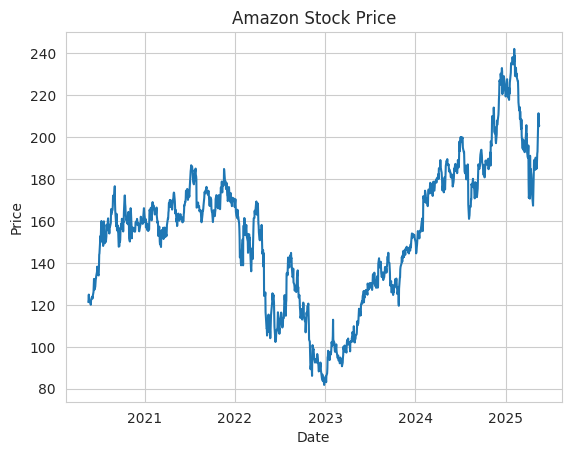

In [115]:

sns.lineplot(data=df,x=df.index, y='Price')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Amazon Stock Price')

plt.show()

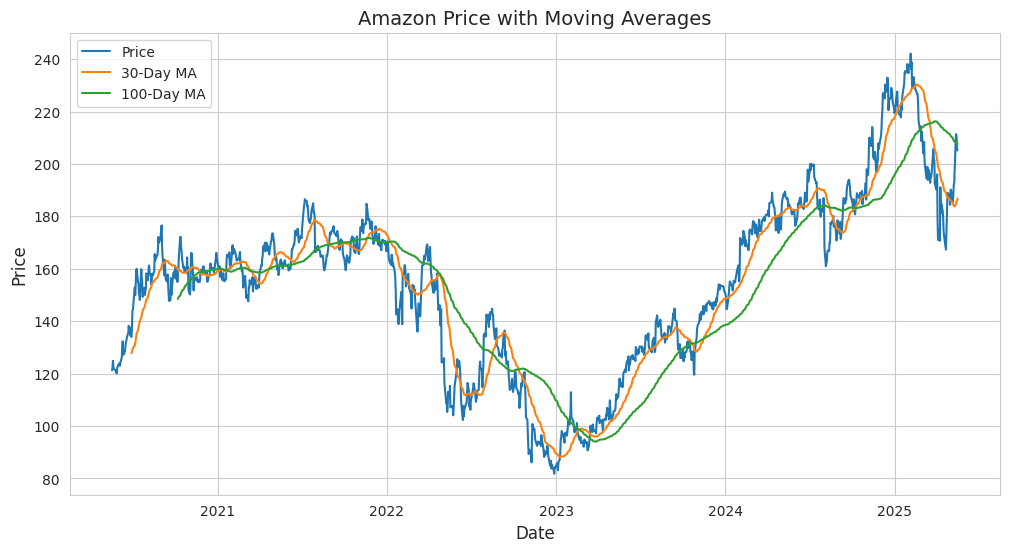

In [116]:
df['30D_MA'] = df['Price'].rolling(window=30).mean()
df['100D_MA'] = df['Price'].rolling(window=100).mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=df.index, y=df['Price'], label='Price')
sns.lineplot(x=df.index, y=df['30D_MA'], label='30-Day MA')
sns.lineplot(x=df.index, y=df['100D_MA'], label='100-Day MA')
plt.title('Amazon Price with Moving Averages', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend()
#plt.tight_layout()
plt.show()

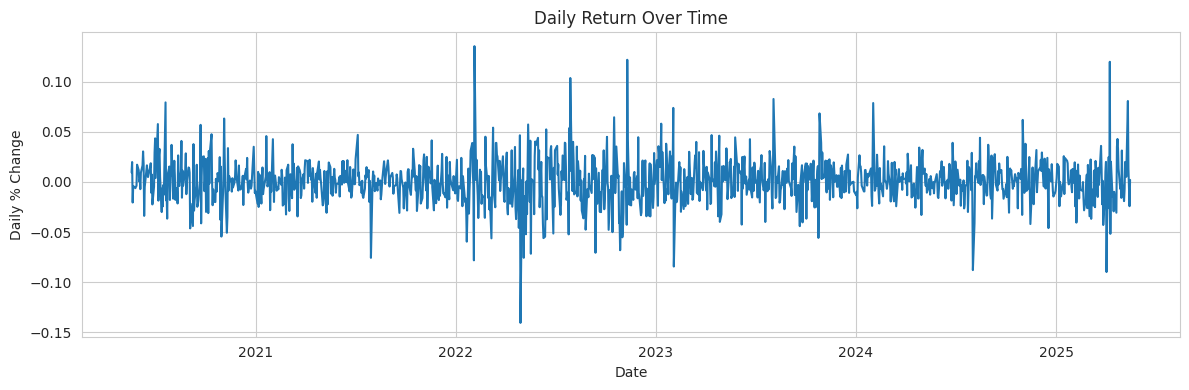

In [117]:
#Analysisng (Volatility) risky or stable was Tesla on a day-to-day basis, over the years
# Calculate daily return
df['Daily Return'] = df['Price'].pct_change()



# 📈 Line plot of Daily Returns
plt.figure(figsize=(12, 4))
sns.lineplot(x=df.index, y=df['Daily Return'])
plt.title("Daily Return Over Time")
plt.xlabel("Date")
plt.ylabel("Daily % Change")
plt.grid(True)
plt.tight_layout()
plt.show()



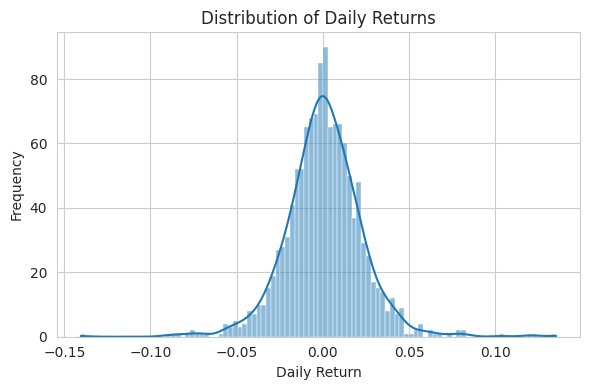

In [118]:
# 📊 Histogram of Daily Returns
plt.figure(figsize=(6, 4))
sns.histplot(df['Daily Return'].dropna(), bins=100, kde=True)
plt.title("Distribution of Daily Returns")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

**Model -Building**

*LSTM are sensitive to scale of data, so we apply MIN-MAX Scalar*

In [119]:
df.drop(columns={'30D_MA', '100D_MA', 'Daily Return'}, inplace=True)





In [120]:
from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))


In [121]:
df

array([[0.24646158],
       [0.25366014],
       [0.26882803],
       ...,
       [0.80148528],
       [0.76978283],
       [0.77240388]])

In [122]:
train_size = int(len(df)*0.65)
test_size = len(df)-train_size
train_data,test_data = df[0:train_size,:],df[train_size:len(df),:1]


In [123]:
(train_size,test_size)

(817, 440)

In [124]:
def create_dataset(dataset,time_step=1):
  dataX, dataY =  [], []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step),0] #i=0,   1,2,3..
    dataX.append(a)
    dataY.append(dataset[i+time_step,0])
  return np.array(dataX) , np.array(dataY)

In [125]:
#reshape into x=t,t+1,t+2,t+3
time_step = 100
x_train ,y_train = create_dataset(train_data,time_step)
x_test ,y_test = create_dataset(test_data,time_step)


In [126]:
(x_train.shape,y_train.shape)

((716, 100), (716,))

In [127]:
(x_test.shape,y_test.shape)

((339, 100), (339,))

In [128]:
#reshape input to be [samples,time steps ,features] which is required in LSTM. so converting in 3D shape because LSTM in keras expect input as [samples,time steps ,features]
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [129]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Build the Stacked LSTM model
model = Sequential()

# First LSTM layer (returns sequences to stack another LSTM)
model.add(LSTM(units=50, return_sequences=True, input_shape=(100, 1)))

# Second LSTM layer (returns sequences to stack another)
model.add(LSTM(units=50, return_sequences=True))

# Third LSTM layer (final LSTM layer)
model.add(LSTM(units=50))

# Fully connected output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')




In [130]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_9 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [131]:
model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=100,
    batch_size=64,

    verbose=1
)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 347ms/step - loss: 0.0667 - val_loss: 0.0499
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 261ms/step - loss: 0.0110 - val_loss: 0.0051
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 214ms/step - loss: 0.0052 - val_loss: 0.0094
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 183ms/step - loss: 0.0038 - val_loss: 0.0093
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 182ms/step - loss: 0.0031 - val_loss: 0.0053
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 211ms/step - loss: 0.0033 - val_loss: 0.0046
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 250ms/step - loss: 0.0031 - val_loss: 0.0036
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 183ms/step - loss: 0.0030 - val_loss: 0.0038
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 182ms/step - loss: 0.0026 - val_loss: 0.0054
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 213ms/step - loss: 0.0027 - val_loss: 0.0052
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 259ms/step - loss: 0.0028 - val_loss: 0.0042
Epoch 12/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4

In [132]:
#  Predict on train and test data
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

#  Inverse transform to original scale
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

#  Evaluate performance using RMSE
import math
from sklearn.metrics import mean_squared_error

# RMSE on Training Data
train_rmse = math.sqrt(mean_squared_error(y_train, train_predict))
print("Train Data RMSE:", train_rmse)

# RMSE on Test Data
test_rmse = math.sqrt(mean_squared_error(y_test, test_predict))
print("Test Data RMSE:", test_rmse)


23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Train Data RMSE: 140.97892672685637
Test Data RMSE: 187.2576913313217


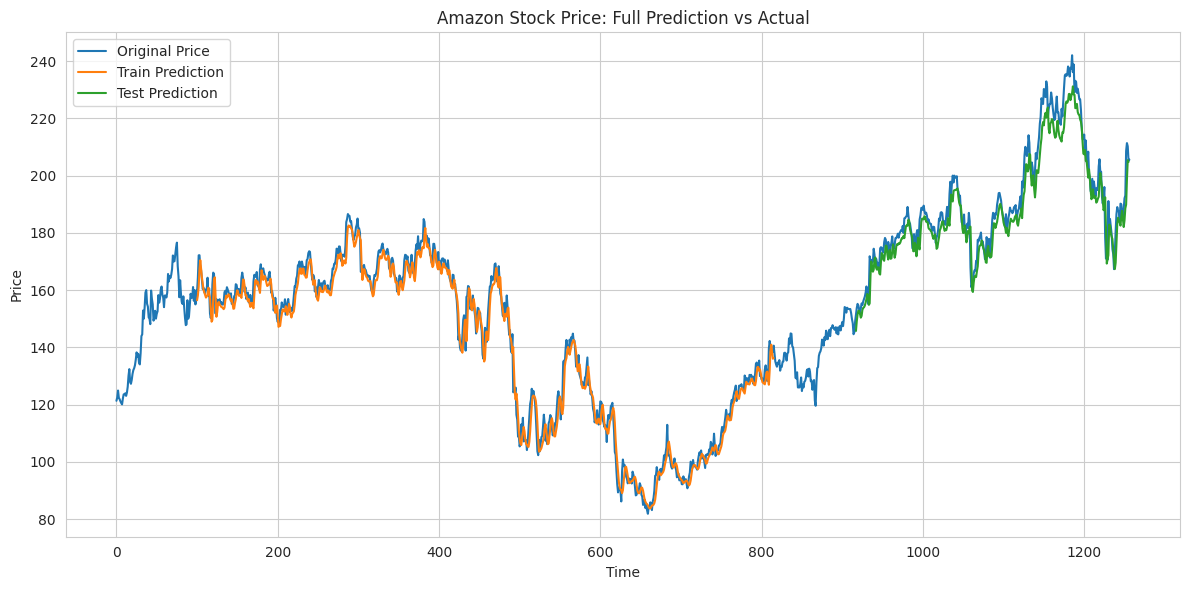

In [133]:
look_back = 100  # or set this to your input_window. time_step

# Shift train predictions for plotting
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# Shift test predictions for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict

# Plot baseline and predictions
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(df), label='Original Price')
plt.plot(trainPredictPlot, label='Train Prediction')
plt.plot(testPredictPlot, label='Test Prediction')
plt.legend()
plt.grid(True)
plt.title("Amazon Stock Price: Full Prediction vs Actual")
plt.xlabel("Time")
plt.ylabel("Price")
plt.tight_layout()
plt.show()


In [136]:
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))


In [137]:
# Ensure correct date alignment by accounting for time_step (look_back)
plotting_data = pd.DataFrame(
    {
        'Actual Price': y_test_inv.reshape(-1),      # inverse transformed test values
        'Predicted Price': test_predict.reshape(-1)  # inverse transformed predictions
    },
    index=df2.index[-len(y_test)-time_step:-time_step]  # Adjusted index range
)

# View more rows to inspect
plotting_data.tail(15)


,Actual Price,Predicted Price
Date,,
2024-11-29,188.990005,182.989059
2024-12-02,187.699997,185.283508
2024-12-03,187.389999,184.282242
2024-12-04,184.419998,183.698975
2024-12-05,190.199997,182.530945
2024-12-06,189.979996,185.577881
2024-12-09,186.350006,187.692093
2024-12-10,185.009995,184.932495
2024-12-11,188.710007,182.040253


In [135]:
#model.save('AMZN_Train.keras')